In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

Although the data analysis and processing stage revealed the absence of lines depending on the length of the mend, we will construct a linear regression for the “reference point”,
in addition, the Statsmodels library has very detailed reports.

In [81]:
X = pd.read_csv('X_por_mat.csv')
y = pd.read_csv('y_reg.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

LINEAR REGRESSION

In [7]:
X_train_lr, X_test_lr = add_constant(X_train), add_constant(X_test) # intercept(b0)

In [11]:
model_lr = OLS(y_train, X_train_lr).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.786
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           1.42e-29
Time:                        10:22:39   Log-Likelihood:                -2196.8
No. Observations:                 835   AIC:                             4474.
Df Residuals:                     795   BIC:                             4663.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.5251      2.356      4.468      0.000       5.901      15.149
age                  -0.0034      0.118     -0.029      0.977      -0.235       0.229
Medu                  0.1673      0.176      0.951      0.342      -0.178       0.513
Fedu                  0.0544      0.154      0.354      0.723      -0.247       0.356
traveltime            0.0112      0.187      0.060      0.952      -0.356       0.378
studytime             0.4977      0.162      3.071      0.002       0.180       0.816
failures             -1.6583      0.204     -8.134      0.000      -2.058      -1.258
famrel                0.1686      0.138      1.221      0.223      -0.103       0.440
freetime             -0.1179      0.131     -0.900      0.368      -0.375       0.139
goout                -0.2654      0.125     -2.122      0.034      -0.511      -0.020
Dalc                 -0.0263      0.175     -0.150      0.881      -0.370       0.317
Walc                  0.0391      0.135      0.290      0.772      -0.225       0.304
health               -0.2072      0.088     -2.345      0.019      -0.381      -0.034
absences             -0.0109      0.020     -0.547      0.585      -0.050       0.028
schoolsup            -1.3306      0.404     -3.296      0.001      -2.123      -0.538
famsup                0.0537      0.262      0.205      0.838      -0.460       0.568
paid                 -0.8756      0.310     -2.823      0.005      -1.484      -0.267
activities           -0.0975      0.255     -0.383      0.702      -0.597       0.402
nursery               0.0525      0.312      0.168      0.867      -0.560       0.665
higher                1.1446      0.473      2.419      0.016       0.216       2.074
internet              0.5044      0.324      1.555      0.120      -0.132       1.141
romantic             -0.6559      0.265     -2.473      0.014      -1.176      -0.135
school                0.8241      0.329      2.504      0.012       0.178       1.470
sex                   0.0144      0.283      0.051      0.959      -0.542       0.571
address               0.2768      0.314      0.881      0.378      -0.340       0.893
famsize              -0.3285      0.283     -1.162      0.246      -0.883       0.226
Pstatus              -0.1010      0.389     -0.260      0.795      -0.864       0.662
Mjob_health           1.2826      0.627      2.044      0.041       0.051       2.514
Mjob_other           -0.1078      0.359     -0.300      0.764      -0.813       0.598
Mjob_services         0.3771      0.431      0.875      0.382      -0.469       1.223
Mjob_teacher         -0.1125      0.572     -0.196      0.844      -1.236       1.011
Fjob_health          -0.2526      0.843     -0.300      0.765      -1.907       1.402
Fjob_other           -0.3155      0.528     -0.598      0.550      -1.352

In [13]:
prediction_lr = model_lr.predict(X_test_lr)
mean_squared_error(y_test, prediction_lr)

11.787912838939574

In [14]:
mean_absolute_error(y_test, prediction_lr)

2.382446284877084

Сonduct an experiment: we'll leave only the features on which the model has identified significance(p-value<0.05)

In [29]:
X_short = X[['studytime', 'failures', 'goout', 'health', 'schoolsup', 'paid', 'higher', 'romantic', 'school']]
X_train_short, X_test_short, y_train, y_test = train_test_split(X_short, y, test_size=0.2, random_state=12)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
X_train_short, X_test_short = add_constant(X_train_short), add_constant(X_test_short)

In [30]:
model_lr_short = OLS(y_train, X_train_short).fit()
model_lr_short.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     24.63
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           1.31e-37
Time:                        10:59:36   Log-Likelihood:                -2217.4
No. Observations:                 835   AIC:                             4455.
Df Residuals:                     825   BIC:                             4502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5032      0.712     14.757      0.000       9.106      11.900
studytime      0.4951      0.151      3.289      0.001       0.200       0.790
failures      -1.7676      0.190     -9.322      0.000      -2.140      -1.395
goout         -0.2355      0.105     -2.247      0.025      -0.441      -0.030
health        -0.1785      0.084     -2.124      0.034      -0.343      -0.014
schoolsup     -1.3835      0.385     -3.595      0.000      -2.139      -0.628
paid          -0.7770      0.301     -2.584      0.010      -1.367      -0.187
higher         1.4614      0.456      3.207      0.001       0.567       2.356
romantic      -0.6245      0.256     -2.438      0.015      -1.127      -0.122
school         1.2494      0.283      4.420      0.000       0.695       1.804
==============================================================================
Omnibus:                      171.229   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.143
Skew:                          -1.120   Prob(JB):                     7.71e-83
Kurtosis:                       5.419   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
prediction_lr_short = model_lr_short.predict(X_test_short)
mean_squared_error(y_test, prediction_lr_short)

11.648406524779952

In [32]:
mean_absolute_error(y_test, prediction_lr_short)

2.4104559266295382

Okay, there were no high expectations. And one more small experiment, add regularization:

In [42]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
predict_ridge = ridge.predict(X_test)
mean_squared_error(y_test, predict_ridge)

11.782912818999685

In [78]:
lasso = Lasso(alpha=0.02)
lasso.fit(X_train, y_train)
predict_lasso = lasso.predict(X_test)
mean_squared_error(y_test, predict_lasso)

11.602141324553651

In [79]:
(lasso.coef_== 0).sum()

np.int64(11)

An interesting observation: if the coefficient in Lasso is set to 1.0, then 38 features out of 39 are set to zero.

RESULTS:
1. Simple linear regression:
   R² = 0.25 - the model explains ~25% of the variance,
   MAE = 2.38 - on average, the forecast error is 2.4 points,
   MSE = 11.79 - sensitive to large errors

Conclusion: the model is weak, but provides a starting point.

2. Feature selection by significance (p-value < 0.05)
    Left 10 features,
    R² dropped to 0.21,
    MAE increased, MSE decreased

Conclusion: Insignificant features can help in combination (perhaps)

4. Lasso and Ridge
    Did not provide significant improvements
    Lasso сan be used as a means of simplifying a model through automatic feature selection

RANDOM FOREST

In [131]:
forest = RandomForestRegressor()
params = {
    'n_estimators': range(100, 501, 50), 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', None], 'bootstrap': [True, False],
}
search_forest = RandomizedSearchCV(forest, params, cv=5, n_jobs=-1, random_state=12)
search_forest.fit(X_train, y_train)
search_forest.best_params_

{'n_estimators': 350,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

In [137]:
forest = RandomForestRegressor()
params = {
    'n_estimators': range(300, 501, 50), 'max_depth': [None, 5, 10], 'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4], 'max_features': ['sqrt', None], 'bootstrap': [True],
}
search_forest = GridSearchCV(forest, params, cv=5, n_jobs=-1)
search_forest.fit(X_train, y_train)
search_forest.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [151]:
forest = search_forest.best_estimator_
tree_depths = [estimator.tree_.max_depth for estimator in forest.estimators_]
[np.mean(tree_depths), np.max(tree_depths), np.min(tree_depths)]

[np.float64(15.902), np.int64(21), np.int64(12)]

In [146]:
prediction_forest = forest.predict(X_test)
mean_squared_error(y_test, prediction_forest)

10.388915773172199

In [143]:
search_forest.best_score_

np.float64(0.29157716109259935)

In [140]:
mean_absolute_error(y_test, prediction_forest)

2.2107147497860624

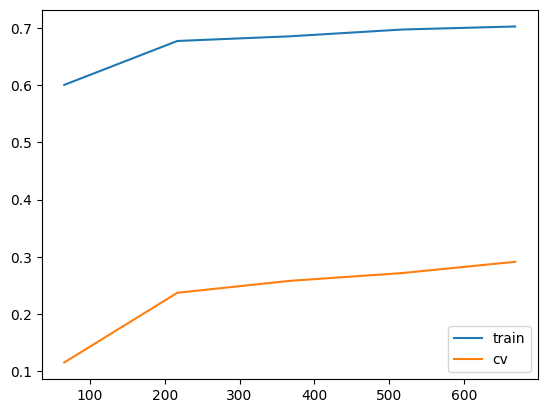

In [147]:
train_sizes, train_scores, test_scores = learning_curve(
    search_forest.best_estimator_, X_train, y_train, cv=5, shuffle=True,)

plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="cv")
plt.legend()

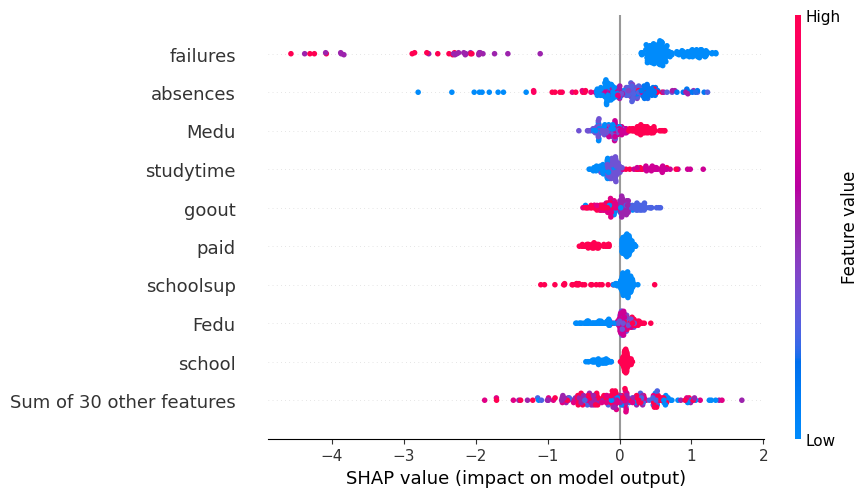

In [170]:
import shap

explainer = shap.Explainer(forest)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

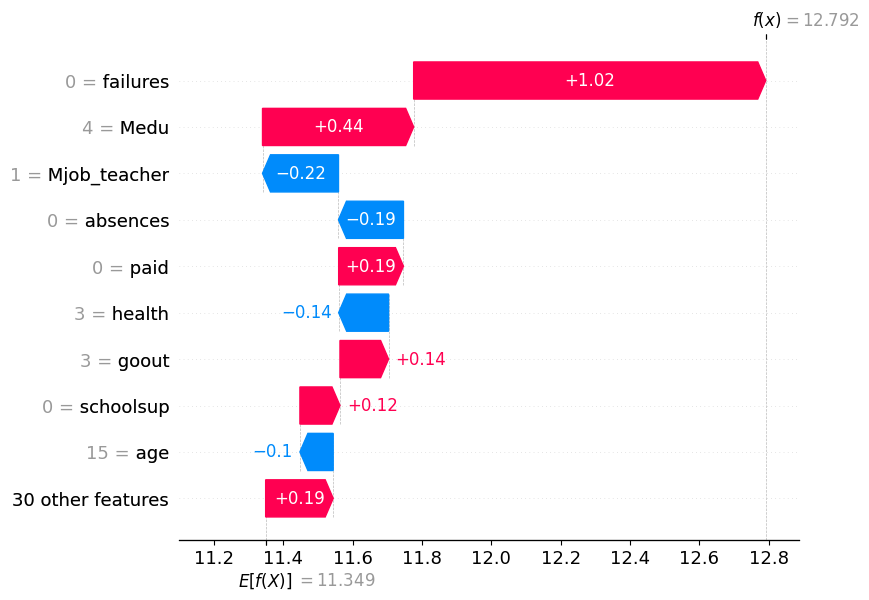

In [181]:
shap.plots.waterfall(shap_values[15])

RESULTS:

R² = 0.29 - the model explains 29% of the variance, MAE = 2.21, MSE = 10.39
Managed to improve the quality of predictions only a little

The learning curve shows a strong gap between training and validation, the generalization ability is limited.
Unfortunately, I was unable to improve the quality of validation.

SHAP analysis identified several key factors (failures, absences)

GRADIENT BOOSTING

In [313]:
boost = XGBRegressor()
params = {'n_estimators': [950, 1000], 'learning_rate': [0.01], 'max_depth': [8, 10], 'subsample': [0.8], 'colsample_bytree': [0.8], 'reg_lambda': [10], 'min_child_weight': [3]}
search_boost = GridSearchCV(boost, params, cv=5, n_jobs=-1)
search_boost.fit(X_train, y_train)
search_boost.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 950,
 'reg_lambda': 10,
 'subsample': 0.8}

In [314]:
search_boost.best_score_

np.float64(0.2863740801811218)

In [315]:
prediction_boost = search_boost.best_estimator_.predict(X_test)
mean_squared_error(y_test, prediction_boost)

9.850502014160156

In [316]:
mean_absolute_error(y_test, prediction_boost)

2.176679849624634

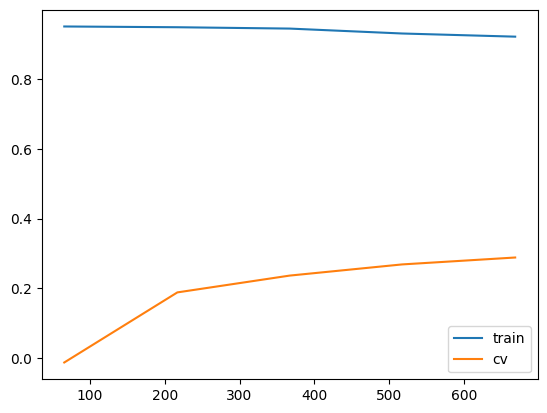

In [317]:
train_sizes, train_scores, test_scores = learning_curve(
    search_boost.best_estimator_, X_train, y_train, cv=5, shuffle=True,)

plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="cv")
plt.legend()

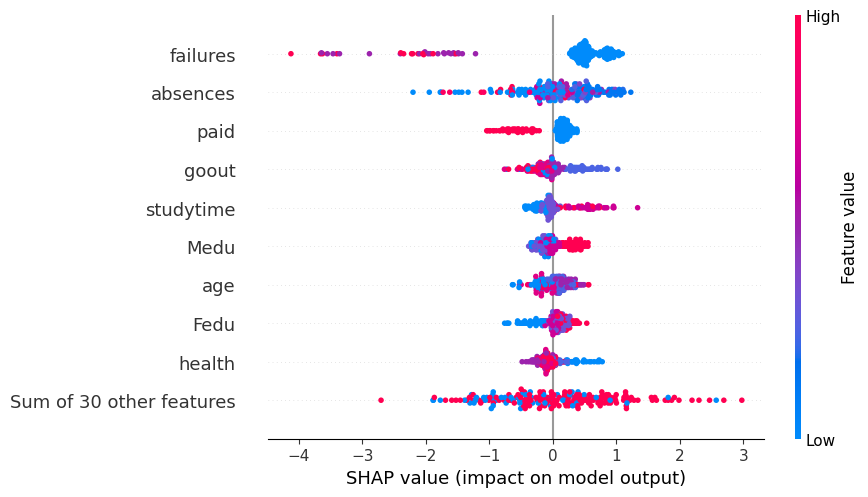

In [308]:
explainer = shap.Explainer(search_boost.best_estimator_)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

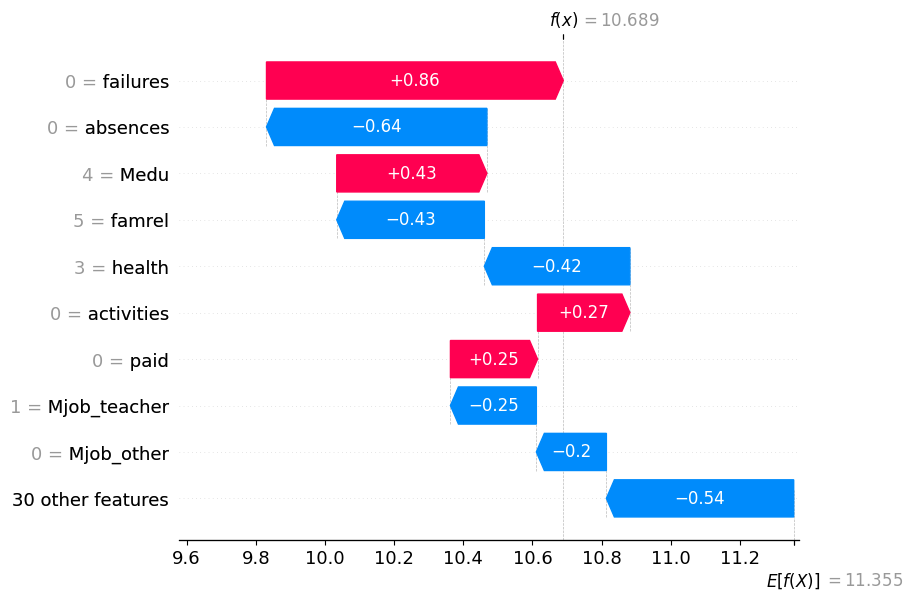

In [309]:
shap.plots.waterfall(shap_values[15])

RESULTS:

R² = 0.29 - the model explains 29% of the variance, MAE = 2.18, MSE = 9.85
The XGBoost model proved to be the most effective, but even it reaches its accuracy limit.

When analyzing the importance of features using SHAP values, it was noticed that for the Random Forest and XGBoost models, the top two features coincide, but then the lists begin to differ.
This is explained by the fact that different models interact with features differently: XGBoost, like boosting, is more sensitive to combinations and weak interactions,
while Random Forest averages over many trees and estimates the importance more "roughly".